# Homework 10 Key
#### CHE 116: Numerical Methods and Statistics


4/9/2020

----

## Problem 1

State which hypothesis best matches the scenario and justify your answer

1. You have the historic mean and standard deviation of temperature for April and want to know if this year's temperature is significantly different.
2. The number of days with snow in April is usually 4, this year it is 1. Is this significant?
3. You take 5 measurements of snow depth in your front yard and 8 measurements in your backyard and want to know if they front and backyard have different amounts of snowfall.
4. You have measured what day of the week it is and what time your phone battery goes dead. Is there a connection?
5. You have measured how frequently your friends text you before and after COVID-19 quarantine and want to know if it has changed significantly.

### Problem 1 Answers
1. zM
2. Poisson
3. Wilcoxon sum of ranks
4. Spearmann Correlation
5. Wilxocon signed rank

# Problem 2

Choose and peform hypothesis tests for the following examples. **Report your p-values!!**

1. The number of yellow skittles is on average 8 per bag. Your bag has 11. Is this significantly different?
2. You normally drink 8 oz of water with a standard deviation of 2 oz. Today you drank 12 oz. Is this significantly different?
3. Ting says your cellphone bill will be about \\$50 or lower if you switch. You switch and find your bills a are \\$48, \\$ 53, \\$67, \\$44. Was their claim correct?

4. You are testing the efficacy of a drug that causes weight loss. You have 15 patients try the drug. Their weights in pounds before are [178,189,136,134,172,171,178,179,154,159,167,149,125,180,135] and after are [174,178,139,133,166,165,172,180,141,145,176,151,108,174,131]. Is the drug effective?


5. You now add a control group which is given a placebo. Their before and after weights are [211,175,151,160,163,137,169,145,171,177,148,145,173,174,167] and [200,171,146,162,178,134,183,148,164,166,141,142,166,167,142]. Is your conclusion the same? Why or why not?

### 2.1

$p = 0.18$

Not significantly different

In [21]:
import scipy.stats as ss
#Poisson
1 - ss.poisson.cdf(10, 8)

0.18411420744145335

### 2.2
$p = 0.045$

This is a significantly different amount of water

In [25]:
Z = (12 - 8) / 2
2 * ss.norm.cdf(-Z)

0.04550026389635839

### 2.3
$p = 0.7$

The bills are not significantly different from what Ting claimed

In [32]:
bills = [45, 53, 67, 44]
bm = np.mean(bills)
bs = np.std(bills, ddof=1)
T = (bm - 50) / (bs / np.sqrt(len(bills)))
2 * ss.t.cdf(-T, df=len(bills) - 1)

0.42348057022481395


0.7004718483539545

### 2.4

$p = 0.02$

The drug is effective

In [38]:
before = [178,189,136,134,172,171,178,179,154,159,167,149,125,180,135] 
after = [174,178,139,133,166,165,172,180,141,145,176,151,108,174,131]
ss.wilcoxon(before, after)

WilcoxonResult(statistic=19.5, pvalue=0.02112008758907893)

### 2.5

There is not a significant different in weight loss between the placebo or drug group, so the drug is no more effective than a placebo. 

In [44]:
beforec = [211,175,151,160,163,137,169,145,171,177,148,145,173,174,167]
afterc = [200,171,146,162,178,134,183,148,164,166,141,142,166,167,142]

changec = [b - a for b,a in zip(beforec,afterc)]
change = [b - a for b,a in zip(before, after)]

ss.ranksums(change, changec)

RanksumsResult(statistic=0.14517323726225953, pvalue=0.8845740956336082)

## Problem 3

Solve the following problems using optimization. **Report your answer in Markdown!**

1. Solve $\tan x = x^2 +  1$. 
2. Minimize $(x - 4)^2$
3. Is $x^2\sin^2x$ non-convex or convex?
4. Solve the following system of equations:

$$
x^2 - y = 18
$$
$$
\sqrt{x} + y^2 = 6
$$

### 3.1

$x = 1.17$

In [48]:
import scipy.optimize as opt

opt.root(lambda x: np.tan(x) - x**2 - 1, x0=1)

    fjac: array([[-1.]])
     fun: array([-2.07389661e-13])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-1.50393884e-08])
       r: array([-4.29069632])
  status: 1
 success: True
       x: array([1.17209362])

### 3.2

$x = 4$

In [49]:
opt.minimize(lambda x: (x - 4)**2, x0=0)

      fun: 1.6517868451916196e-16
 hess_inv: array([[0.5]])
      jac: array([-1.08032108e-08])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([3.99999999])

### 3.3
This is non-convex

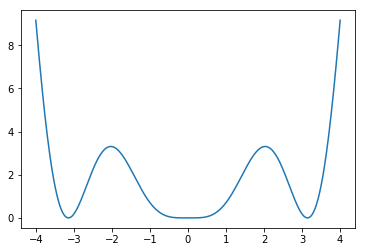

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
x = np.linspace(-4, 4, 500)
plt.plot(x, x**2 * np.sin(x)**2)

### 3.4
Two solutions (ok to report just 1)
$x,y = 4.47, 1.97$; $x,y = 4, -2$

In [56]:
def sys(v):
    x = v[0]
    y = v[1]
    return [x**2 - y - 18, np.sqrt(x) + y**2 - 6]
opt.root(sys, x0 = [1,-1])

    fjac: array([[-0.99930056, -0.0373951 ],
       [ 0.0373951 , -0.99930056]])
     fun: array([-3.19744231e-14, -3.10862447e-14])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([-8.24822349e-10, -7.51151959e-10])
       r: array([-8.05791962,  1.12720016,  3.94005999])
  status: 1
 success: True
       x: array([ 4., -2.])